Student Name: Pranjal Jain

Student Netid: pj2069

# **Foundations of Data Science Fall 2022 - Homework 0 (30 points)**

---



### **Part 1: Pre-class survey (5 Points)**

---


- Fill in [this survey](https://forms.gle/RTARKZaQmP1WDzu18) which will help our course team understand student backgrounds and interests.


### **Part 2: Case study (5 Points)**

---


- Read [this article](https://drive.google.com/file/d/1zRxm8WrOtdeT1pQKgKcjzd3J1x8GLTtb/view?usp=sharing) in the New York Times.
- Use what we've learned in class and from the book to describe how one could set Target's problem up as a predictive modeling problem, such that they could have gotten the results that they did.  Formulate your solution as a proposed plan using our data science terminology.  Include aspects of the Data Science Workflow that you see as relevant to solving the problem.  Be precise but concise.


Place your answer here!

Target’s problem can be described as a predictive modeling problem as they aim to build a model that predicts if customers are pregnant and are expecting their baby soon. They do this because: with a life-changing situation such as pregnancy,  they expect their customer’s shopping habits to change drastically and make Target their one store for all their needs. By offering coupons and exclusive deals to potential mothers, they can leverage the pregnancy to move to Target. 

The main task of Target is to predict when its customers are pregnant without explicitly knowing or asking. This can be done by analyzing what are the shopping habits of their pregnant customers. This problem has a multistep solution which is:

1) First, collect data on shopping habits (from their own databases or others) along with characteristics data like age, occupation, ethnicity, home address, work address, and more, which can be acquired by either requesting or buying from external sources. 

2) All this data needs to be joined, cleaned, and id-ied in order to have detailed and structured data on an individual user. The data should be acquired in a meticulous manner and should have both pregnant and non-pregnant customer habits so that model can learn the difference and distinguish. 

3) The data needs to be analyzed and we need to find the Principal components which actually affect the possibility of pregnancy.

4) The model can then be trained on a suitable classification model and learn the aspects and conditions that predict a pregnant customer. The model can use logistic regression, decision trees, SVMs, KNN, Neural Networks, and more. The data should also be portioned in order to have some data used just for verification.



### **Part 3: Exploring data in the command line (4 Points - 1 Point Each)**

---




*   For this part we will be using the data file `"loansData.csv"`. This file 
consists of records that pertain to some loan records in a local bank. There are 15 comma separated columns in this order: 
>> `CustNUm`, `Amount.Requested`,	`Amount.Funded.By.Investors`,	`Interest.Rate`,	`Loan.Length`,	`Loan.Purpose`,	`Debt.To.Income.Ratio`,	`State`,	`Home.Ownership`,	`Monthly.Income`,	`FICO.Range`,	`Open.CREDIT.Lines`,	`Revolving.CREDIT.Balance`,	`Inquiries.in.the.Last.6.Months`, and	`Employment.Length`. 
*   These fields contain data of type `int`, `float`, and `string`, and you can also locate a file `"data/loansData_columns.csv"`in the data folder containing all the column names for easy reference.  Answer the following questions using Linux/Unix bash commands. All questions can be answered in one line (sometimes, with pipes)! Some questions will have many possible solutions. Don't forget that in iPython notebooks you must prefix all bash commands with an exclamation point, i.e. `"!command arguments"`.


>>**1**\. *How many records (lines) are in this file?*




In [86]:
# Place your code here

!wc -l loansData.csv

2501 loansData.csv


>>**2**\. *How many unique `State` (the 8th field) are in this file? (hint: consider the 'cut' command and use pipe operator '|')*



In [87]:
# Place your code here

!cut -d "," -f 8 loansData.csv | sort | uniq -c | wc -l

47


>>**3**\. *Rank all domains by the number of `Loan.Purpose` (the 6th field) they requested in descending order. (hint: consider the 'cut', 'uniq' and 'sort' commands and the pipe operator).*



In [88]:
# Place your code here

!cut -d "," -f 6 loansData.csv | sort -r | uniq

"wedding"
"vacation"
"small_business"
"renewable_energy"
"other"
"moving"
"medical"
"major_purchase"
"house"
"home_improvement"
"educational"
"Debt.To.Income.Ratio"
"debt_consolidation"
"credit_card"
"car"


>>**4**\. *List all records which have `FICO.Range` (the 11th field) from 815-819. (hint: this can be done using 'grep')*




In [89]:
# Place your code here

!grep -w "815-819" loansData.csv

"64884",9000,9000,"6.03%","36 months","vacation","5.58%","NJ","MORTGAGE",9583.33,"815-819",11,675,0,"n/a"
"55501",8000,8000,"6.03%","36 months","debt_consolidation","4.51%","OR","MORTGAGE",3500,"815-819",9,6737,0,"10+ years"
"93374",16500,16500,"6.03%","36 months","debt_consolidation","22.65%","CA","MORTGAGE",5416.67,"815-819",17,14835,0,"10+ years"
"90568",4800,4800,"6.62%","36 months","car","10.42%","TX","MORTGAGE",7291.67,"815-819",14,0,0,"< 1 year"
"80302",16800,16800,"7.90%","60 months","debt_consolidation","3.34%","FL","MORTGAGE",10666.67,"815-819",7,4757,0,"10+ years"
"5906",12800,12787.71,"8.94%","36 months","debt_consolidation","0.18%","AZ","MORTGAGE",2833.33,"815-819",7,306,0,"4 years"


### **Part 4: Dealing with data Pythonically (16 Points)**

---



In [90]:
# You might find these packages useful. You may import any others you want!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

>>**1**\. **(1 Point)** *Load the data set `"data/ads_dataset.tsv"` and load it into a Python Pandas data frame called `ads`.*




In [91]:
# Place your code here

ads = pd.read_csv('new_ads_dataset.tsv',sep = '\t')

>>**2**\. **(4 Points)** *Write a Python function called `getDfSummary()` that does the following:*
- *Takes as input a data frame*
- *For each variable in the data frame calculates the following features:*
  - *`number_nan` to count the number of missing not-a-number values*
  - *Ignoring missing, NA, and Null values:*
    - *`number_distinct` to count the number of distinct values a variable can take on*
    - *`mean`, `max`, `min`, `std` (standard deviation), and `25%`, `50%`, `75%` to correspond to the appropriate percentiles*
- *All of these new features should be loaded in a new data frame. Each row of the data frame should be a variable from the input data frame, and the columns should be the new summary features.*
- Returns this new data frame containing all of the summary information
*italicized text*
>>**Hint:** *The pandas `describe()` [(manual page)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method returns a useful series of values that can be used here.*



In [92]:
def getDfSummary(input_data):
  column_names = input_data.columns.values

  missingVal = []
  uniqVals = []
  maxVals = []
  minVals = []
  meanVals = []
  stdVals = []
  per25Vals = []
  per50Vals = []
  per75Vals = []


  for i in column_names:

    missingVal.append(input_data[i].isna().sum())
    uniqVals.append(len(pd.unique(input_data[i].dropna())))
    maxVals.append(input_data[i].dropna().max())
    minVals.append(input_data[i].dropna().min())
    meanVals.append(input_data[i].dropna().mean())
    stdVals.append(input_data[i].dropna().std())
    per25Vals.append(input_data[i].dropna().quantile(0.25))
    per50Vals.append(input_data[i].dropna().quantile(0.50))
    per75Vals.append(input_data[i].dropna().quantile(0.75))

  output_data = pd.DataFrame({ 'name':column_names, 'missingVal': missingVal,
                    'uniqVals': uniqVals, 
                    'maxVals': maxVals,
                    'minVals': minVals,
                    'meanVals': meanVals,
                    'stdVals': stdVals,
                    'per25Vals': per25Vals,
                    'per50Vals': per50Vals,
                    'per75Vals': per75Vals})
  output_data

  return output_data

>>**3**\. **(1 Point)** *How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.*

>>**Hint:** *`%timeit getDfSummary(ads)`*



In [94]:
# Place your code here

%timeit getDfSummary(ads)

108 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


>>**4**\. **(2 Points)** *Using the results returned from `getDfSummary()`, which fields, if any, contain missing `NaN` values?*




In [95]:
# Place your code here
results = getDfSummary(ads)
results.loc[(results['missingVal'] > 0)]

,name,missingVal,uniqVals,maxVals,minVals,meanVals,stdVals,per25Vals,per50Vals,per75Vals
1,video_freq,52257,10,15.0,1.0,1.240653,0.782228,1.0,1.0,1.0


>>**5**\. **(4 Points)** *For the fields with missing values, does it look like the data is missing at random? Are there any other fields that correlate perfectly, or predict that the data is missing? If missing, what should the data value be?*

>>**Hint:** *create another data frame that has just the records with a missing value. Get a summary of this data frame using `getDfSummary()` and compare the differences. Do some feature distributions change dramatically?*

>>---



In [96]:
# Place your code and response here

Missing = ads[ads['video_freq'].isnull()]
getDfSummary(Missing)

,name,missingVal,uniqVals,maxVals,minVals,meanVals,stdVals,per25Vals,per50Vals,per75Vals
0,is_video_user,0,1,0.00000,0.0000,0.000000,0.000000,0.0,0.0,0.000000
1,video_freq,52257,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,call_freq,0,48,84.00000,1.0000,1.651549,2.147955,1.0,1.0,2.000000
3,video_interval,0,1,0.00000,0.0000,0.000000,0.000000,0.0,0.0,0.000000
4,call_interval,0,5112,184.91670,0.0000,5.686388,17.623555,0.0,0.0,0.041667
5,expected_video_time,0,1,0.00000,0.0000,0.000000,0.000000,0.0,0.0,0.000000
6,expected_call_time,0,13351,91.40192,-187.6156,-9.669298,31.239030,0.0,0.0,0.000000
7,last_bill,0,189,188.00000,0.0000,65.741317,53.484622,19.0,52.0,106.000000
8,next_bill,0,189,188.00000,0.0000,65.741317,53.484622,19.0,52.0,106.000000
9,multiple_video,0,1,0.00000,0.0000,0.000000,0.000000,0.0,0.0,0.000000


'Video_freq' is missing when we have 'is_video_user', 'video_interal', 'expected_video_time' and 'multiple_video' as 0. We can substitute the values for 'is_video_user' to get 'Video_freq'.

>>**6**\. (**2 Points)** *Which variables are binary?*




In [97]:
# Place your code here

Binary = getDfSummary(ads)
Binary[Binary['uniqVals'] == 2].name

0        is_video_user
9       multiple_video
10    multiple_carrier
13            is_churn
Name: name, dtype: object

>>**7**\. **(0.5 Point)** *Let's take a deeper look into one of the features, the `num_texts`, which stands for the number of text messages. Let's try and understand the distribution of this field. We can do this using the hist() method and matplotlib. Draw a histogram graph of `num_texts` from the dataframe `ads`, set the title of the graph as `'Histogram of Number of Texts'`.*

Text(0.5, 1.0, 'Histogram for Number of Texts')

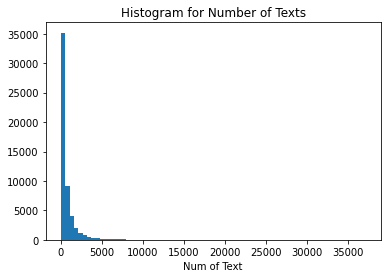

In [98]:
# Place your code here

plt.hist(ads['num_texts'], bins = 70)
plt.xlabel('Num of Text')
plt.title('Histogram for Number of Texts')

>>**8**\. **(1.5 Point)** *How would you characterize the shape of this distribution? Is there anything we can do to the texts variable to make the distribution more bell curved?*

>>**Hint:** *Let's create a new column in the dataframe called `'log_num_texts'` and print a histogram `'Histogram of Log(Num Texts)'` of it. What might be some advantages of making such a transformation?*

Text(0.5, 1.0, 'Histogram of Log(Num Texts)')

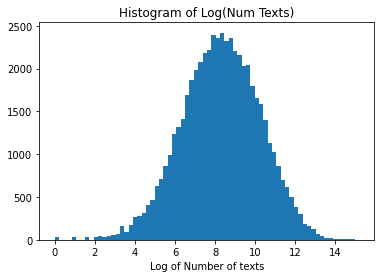

In [99]:
# Place your code and response here

log_num_texts = np.log2(ads['num_texts'])
plt.hist(log_num_texts, bins = 70)
plt.xlabel('Log of Number of texts')
plt.title('Histogram of Log(Num Texts)')

##  **End of Homework 0**